# Importing Important Libary & Dataset

Best Fil Line Draw for Height & Weight Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Height-Weight Data.csv")  #importing dataset

In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.shape

(3501, 2)

# Visualization Of Dataset

Text(0.5, 1.0, 'Height-Weight Data')

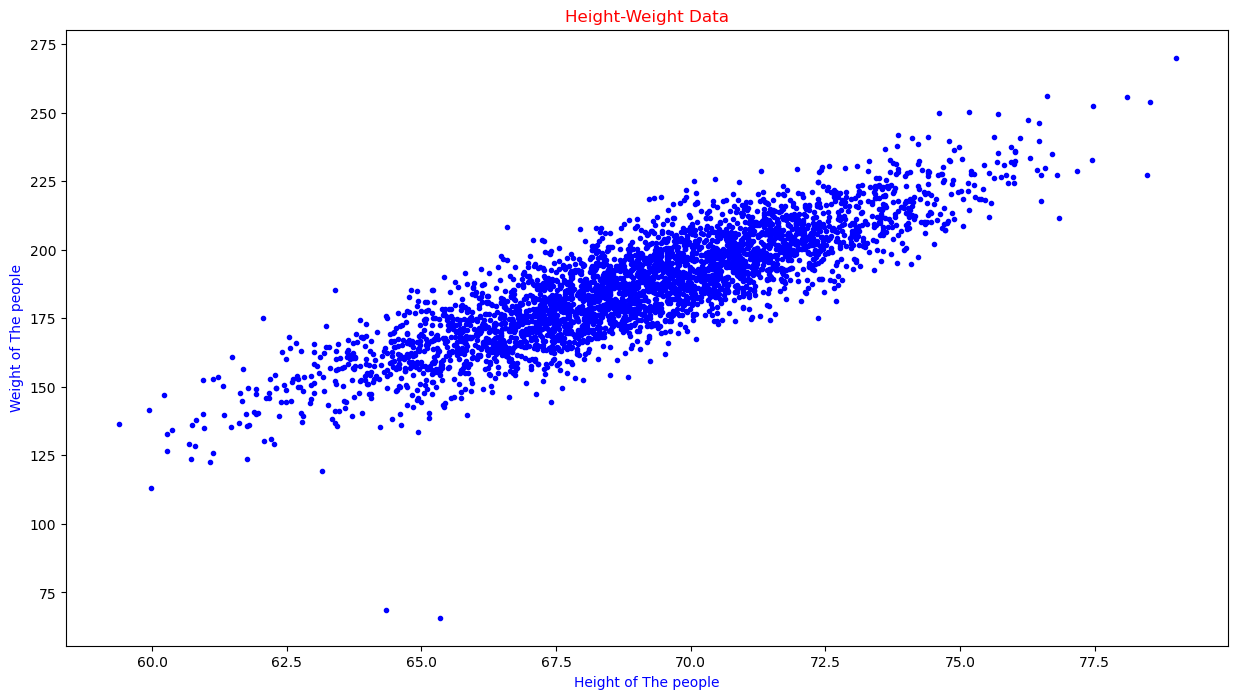

In [5]:
plt.figure(figsize=(15,8)) 
plt.scatter(df['Height'] , df['Weight'], color='blue',marker='.')
plt.xlabel("Height of The people",color="blue")
plt.ylabel("Weight of The people",color="blue")
plt.title("Height-Weight Data",color="red")

In [6]:
df.Height.mean() , df.Weight.mean()

(69.02441087268797, 186.89125797946284)

# Slicing The Dataset

In [7]:
x = df[['Height']]
y = df[['Weight']]

In [8]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [9]:
x.shape

(3501, 1)

In [10]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [11]:
y.shape

(3501, 1)

# SPLITTING THE DATASET FOR TRAINING

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
xtrain, xtest ,ytrain, ytest = train_test_split (x,y, test_size = .25 ,random_state=1) #Testing Data=25%

In [14]:
xtrain.head() 

,Height
525,68.624063
1792,68.829216
3314,69.197548
1562,67.867665
3086,65.234102


In [15]:
ytrain.head()

,Weight
525,159.862467
1792,200.330819
3314,191.542329
1562,168.817572
3086,167.372980


In [16]:
xtrain.shape , ytrain.shape

((2625, 1), (2625, 1))

In [17]:
xtest.head()

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902


In [18]:
ytest.head()

,Weight
719,192.672676
2296,187.491501
3083,191.563495
1296,177.909685
2234,165.313807


In [19]:
xtest.shape , ytest.shape

((876, 1), (876, 1))

# MODEL CREATION

Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg_model = LinearRegression() #obj creation

In [23]:
reg_model.fit(xtrain,ytrain) #Training ML Model

LinearRegression()

In [24]:
m = reg_model.coef_
m

array([[5.970757]])

In [25]:
c = reg_model.intercept_
c

array([-225.30772886])

In [26]:
df['Predicted Rent'] = reg_model.predict(x)
df.head()

,Height,Weight,Predicted Rent
0,73.847017,241.893563,215.614865
1,68.781904,162.310473,185.372306
2,74.110105,212.740856,217.185702
3,71.730978,220.042470,202.980513
4,69.881796,206.349801,191.939493


# BEST FIT LINE VISUALIZATION

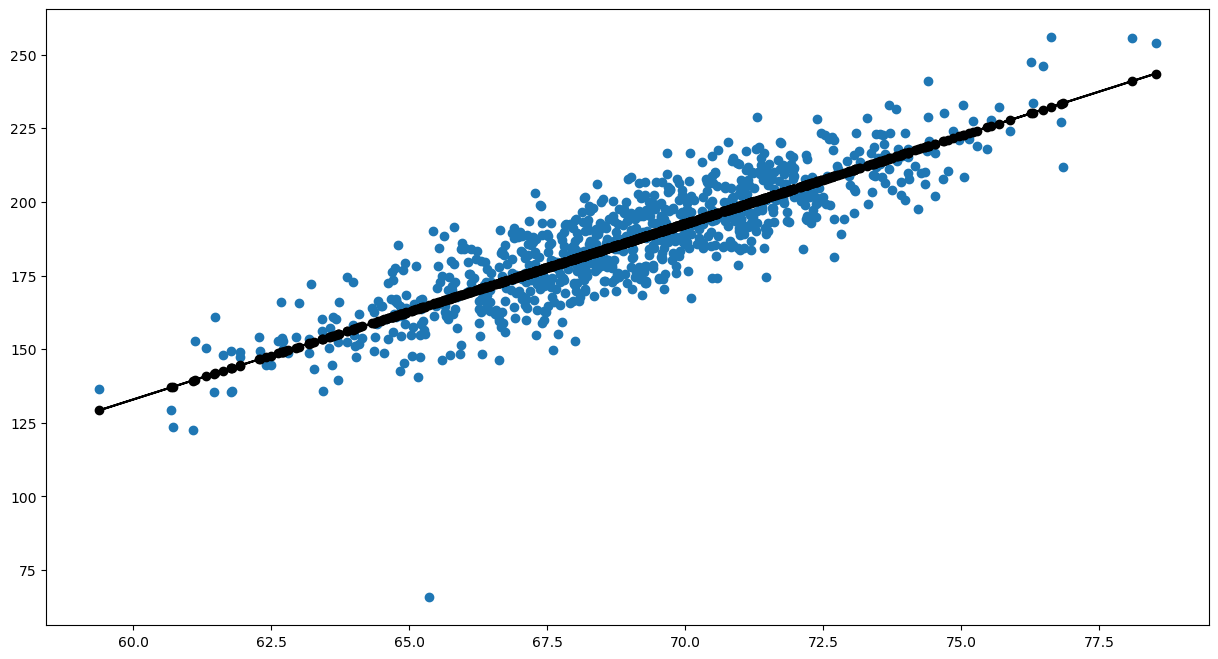

In [27]:
plt.figure(figsize=(15,8))
plt.scatter(xtest,ytest)
plt.plot(xtest,reg_model.predict(xtest), marker = 'o',color='black')

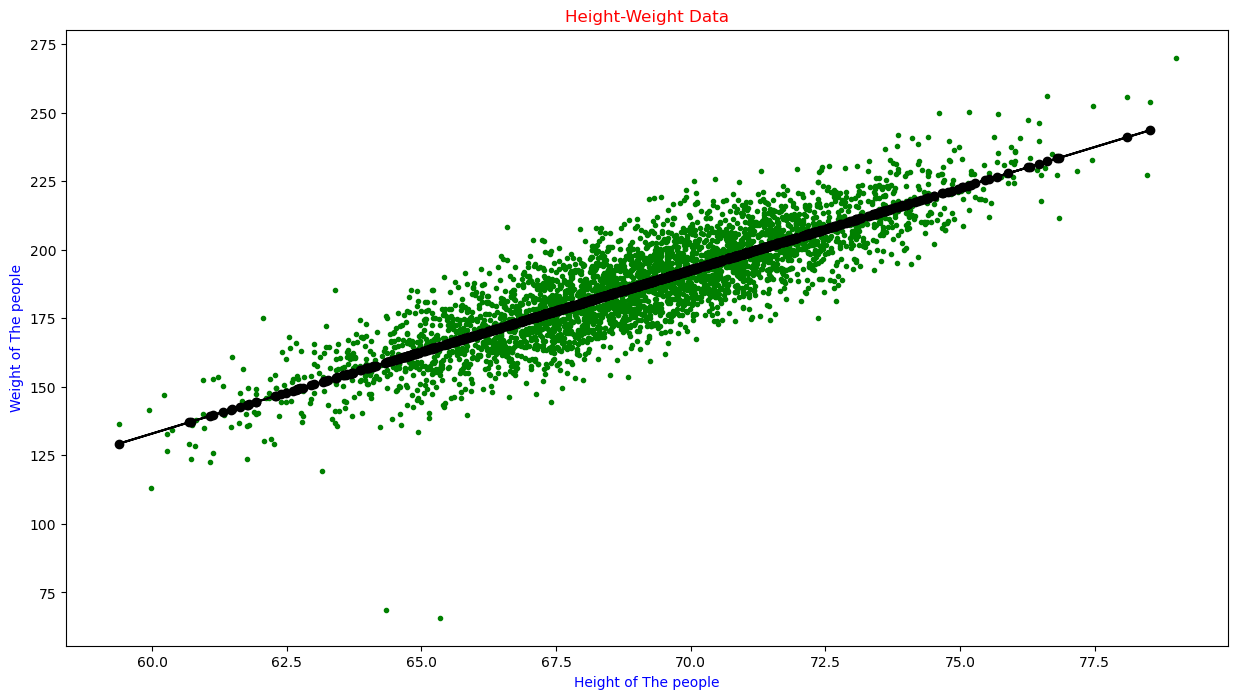

In [28]:
plt.figure(figsize=(15,8)) 
plt.scatter(df['Height'] , df['Weight'], color='green',marker='.', label =' Raw')
plt.plot(xtest,reg_model.predict(xtest), marker = 'o',color='black', label='Model')
plt.xlabel("Height of The people",color="blue")
plt.ylabel("Weight of The people",color="blue")
plt.title("Height-Weight Data",color="red")
plt.savefig('graph.pdf')

# Error Check

In [29]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [30]:
pred=reg_model.predict(xtest) 

mse = mean_squared_error (ytest,pred)
mae = mean_absolute_error (ytest,pred)

In [31]:
mse

111.53431428776675

In [32]:
mae

8.226502913131542

In [33]:
reg_model.score(xtest, ytest)

0.7370876521149996